# We will use PCA only using numpy for matrices operations and matplotlib for data visualisation

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


# First we have to standard the data to counter the problem of different scales of columns
For that, we convert every element of a respective column using
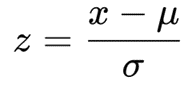
Where x is the original feature, μ is the mean of the column, and σ is the standard deviation of column.

In [23]:
data_mean = np.mean(data.data, axis=0)
data_std = np.std(data.data, axis=0)


In [24]:
Standard_data = (data.data - data_mean)/data_std
len(Standard_data)


569

In [25]:
Standard_data_mean = np.mean(Standard_data, axis=0)
Standard_data_mean

array([-3.16286735e-15, -6.53060890e-15, -7.07889127e-16, -8.79983452e-16,
        6.13217737e-15, -1.12036918e-15, -4.42138027e-16,  9.73249991e-16,
       -1.97167024e-15, -1.45363120e-15, -9.07641468e-16, -8.85349205e-16,
        1.77367396e-15, -8.29155139e-16, -7.54180940e-16, -3.92187747e-16,
        7.91789988e-16, -2.73946068e-16, -3.10823423e-16, -3.36676596e-16,
       -2.33322442e-15,  1.76367415e-15, -1.19802625e-15,  5.04966114e-16,
       -5.21317026e-15, -2.17478837e-15,  6.85645643e-16, -1.41265636e-16,
       -2.28956670e-15,  2.57517109e-15])

# Next step after standardizing the data is make the Covarience matrix, so that eigenvectors and eigenvalues(covariences of eigenvectors) can be found for PCA

In [26]:
Covarience_mat = np.cov(Standard_data, rowvar=0)
eigenvalues, eigenvectors = np.linalg.eig(Covarience_mat)
eigenvalues.shape, eigenvectors.shape

((30,), (30, 30))

# Here, we sort the indices of eigenvalue array according to their values from high to low. Then using these indices, we sort the eigenvectors

In [27]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Since we are reducing the dimentionality to 2, we select 2 eigenvectors with highest covariences 

In [28]:
n_components = 2
components = eigenvectors_sorted[:, :n_components]


# Now the Standardize data of 569 X 30 is multiplied to 30 X 2, which converts the data into 569 X 2.

In [29]:
New_Standard_data = np.matmul(Standard_data, components)

Text(0, 0.5, 'pc2')

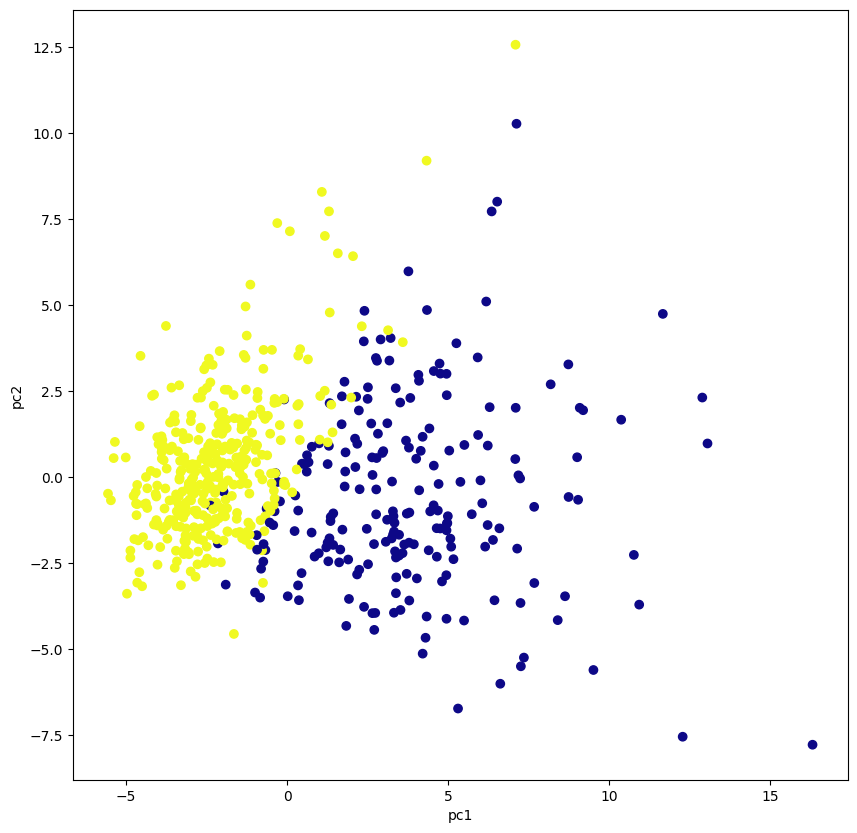

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(New_Standard_data[:,0], New_Standard_data[:,1], c=data['target'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [31]:
x = New_Standard_data
x

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [32]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

# Define a fucntion which find the centroids nearest to each point and store the indices of the centroids in a array

In [33]:
def find_closest_centroids(X, centroids):

    # Set K
    K = centroids.shape[0]
    print(K)
    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    
    for i in range(X.shape[0]):  #This is number of rows or total points of the data
        dist = []
        for j in range(K):
            nor = np.linalg.norm(X[i] - centroids[j])
            dist.append(nor)
            
        idx[i] = dist.index(min(dist))
            
            
        
     ### END CODE HERE ###
    
    return idx

# Computing of new centroids will be done according the mean value of the nearest points

In [34]:
def compute_centroids(X, idx, K):
  
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    for i in range(K):
        sumation = sum([X[j] for j in range(m) if idx[j] == i])
        num = len([0 for j in range(m) if idx[j] == i])
        centroids[i] = sumation/num
         
    ### END CODE HERE ## 
    
    return centroids

# This function helps in initializing the centroid values using the given dataset

In [35]:
def kMeans_init_centroids(X, K):

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

# Making a function which run the above functions to complete the K-Means Algorithm and return 2 arrays of the final values of centroids and indices of centroids nearest to each of the point

In [36]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [37]:
K = 2
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(x, K)

# Run K-Means
centroids, idx = run_kMeans(x, initial_centroids, max_iters, plot_progress=True)

K-Means iteration 0/9
2
K-Means iteration 1/9
2
K-Means iteration 2/9
2
K-Means iteration 3/9
2
K-Means iteration 4/9
2
K-Means iteration 5/9
2
K-Means iteration 6/9
2
K-Means iteration 7/9
2
K-Means iteration 8/9
2
K-Means iteration 9/9
2


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'K-Means Clustering')

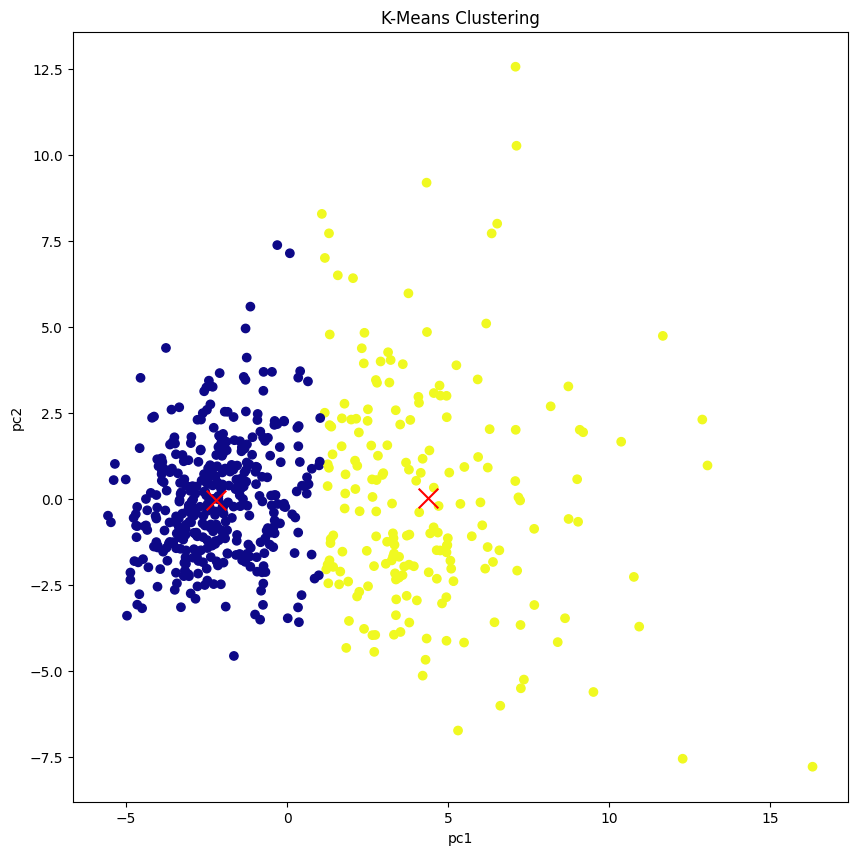

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming `x` is your data array and `idx` contains the cluster assignments
plt.figure(figsize=(10, 10))
plt.scatter(x[:, 0], x[:, 1], c=idx, cmap='plasma', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('K-Means Clustering')

